# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [475]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [476]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [477]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [478]:
data = pd.read_csv('./train.csv')

In [479]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [480]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [481]:
# # YOUR CODE
# random_rows = data.sample(n=5, random_state=0)
# random_rows
data.sample(n=5, random_state=0)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4650,66,20.35,1359.5,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,0
29,25,89.70,2187.55,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
1688,36,76.35,2606.35,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Mailed check,0
2946,20,19.60,356.15,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
4865,13,98.00,1237.85,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [482]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

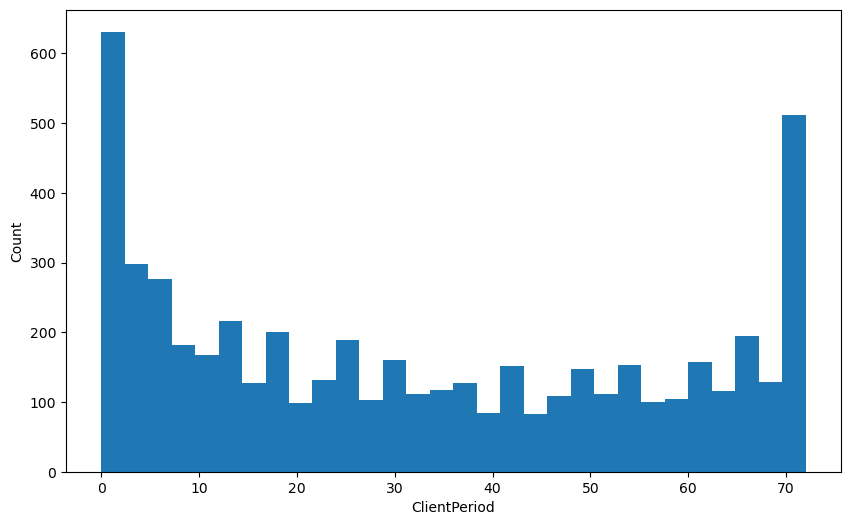

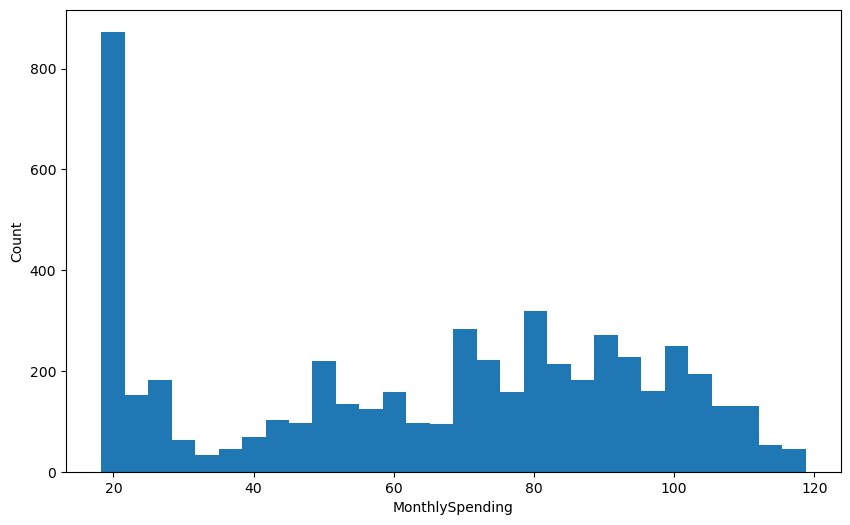

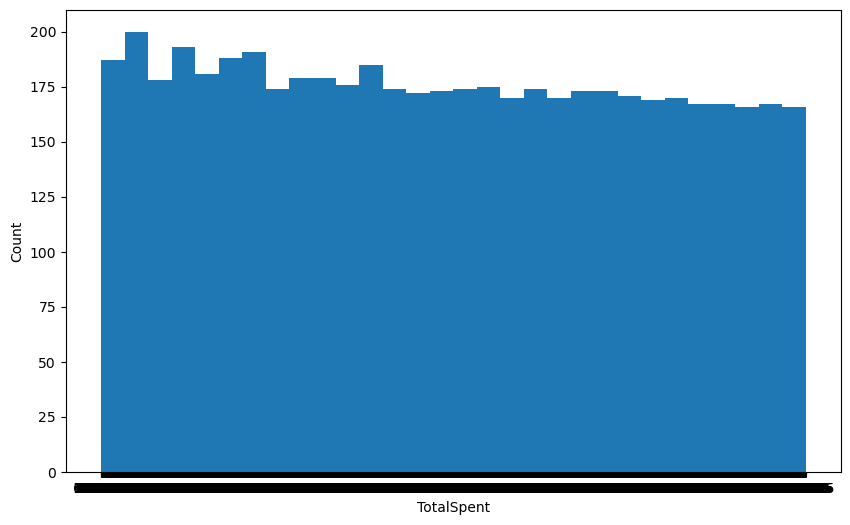

In [483]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(data[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# for col in num_cols:
#     plt.figure(figsize=(10, 6))
#     plt.boxplot(data[col], vert=False)



у ClientPeriod и MonthlySpending есть выбросы на некторых значениях => применим нормализацию данных
У TotalSplent количество всех значений +- равное

In [484]:
data[num_cols]=data[num_cols].replace('', np.nan).replace(' ', np.nan)
data = data.dropna(subset=num_cols)

In [485]:
corr_matrix = data[num_cols].corr()
corr_matrix

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.000000,0.248583,0.826332
MonthlySpending,0.248583,1.000000,0.652034
TotalSpent,0.826332,0.652034,1.000000


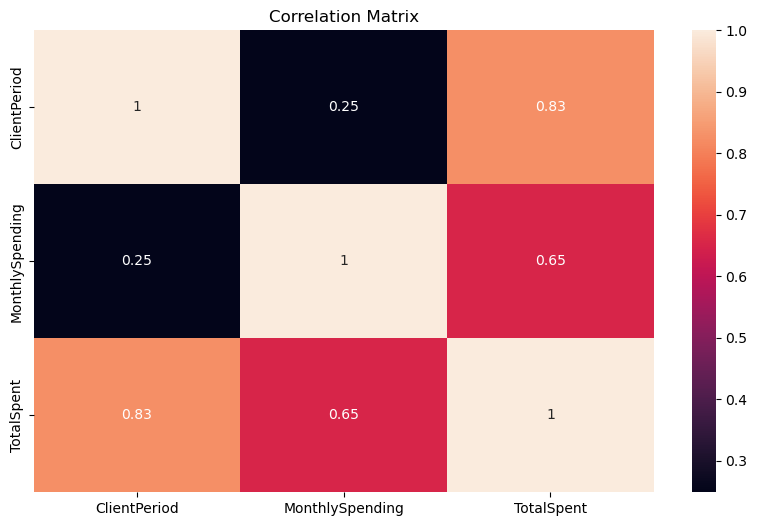

In [486]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Есть сильная корреляция между TotalSpent и ClientPeriod => Создадим новый признак опирающийся на эти два

In [487]:
# del_num_cols = ['TotalSpent']
# data = data.drop(columns=del_num_cols)
# num_cols = list(set(num_cols) - set(del_num_cols))
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [488]:
data.loc[:, 'SpentPerPeriod'] = data['TotalSpent'].apply(float)/data['ClientPeriod']
del_num_cols = ['TotalSpent', 'ClientPeriod']
data = data.drop(columns=del_num_cols)
num_cols = (list(set(num_cols) - set(del_num_cols)))
num_cols.append('SpentPerPeriod')

/var/folders/_y/43jnj0hj0cjgvrt9dxjp68100000gn/T/ipykernel_15397/3520742646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'SpentPerPeriod'] = data['TotalSpent'].apply(float)/data['ClientPeriod']


In [489]:
data

,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,SpentPerPeriod
0,19.50,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,18.660909
1,25.85,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0,26.002778
2,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1,75.900000
3,79.30,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0,80.312500
4,115.25,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0,112.640833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,30.40,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0,27.383333
5278,44.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0,43.769000
5279,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0,55.050000
5280,76.00,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0,76.387931


Sex
Male      2651
Female    2622
Name: count, dtype: int64
IsSeniorCitizen
0    4431
1     842
Name: count, dtype: int64
HasPartner
No     2704
Yes    2569
Name: count, dtype: int64
HasChild
No     3676
Yes    1597
Name: count, dtype: int64
HasPhoneService
Yes    4754
No      519
Name: count, dtype: int64
HasMultiplePhoneNumbers
No                  2508
Yes                 2246
No phone service     519
Name: count, dtype: int64
HasInternetService
Fiber optic    2341
DSL            1795
No             1137
Name: count, dtype: int64
HasOnlineSecurityService
No                     2611
Yes                    1525
No internet service    1137
Name: count, dtype: int64
HasOnlineBackup
No                     2331
Yes                    1805
No internet service    1137
Name: count, dtype: int64
HasDeviceProtection
No                     2316
Yes                    1820
No internet service    1137
Name: count, dtype: int64
HasTechSupportAccess
No                     2603
Yes                   

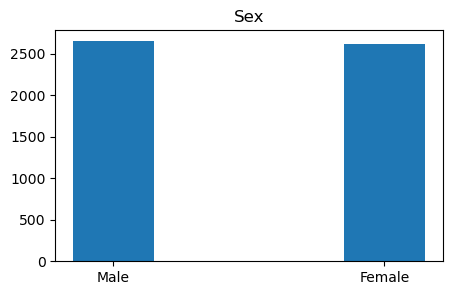

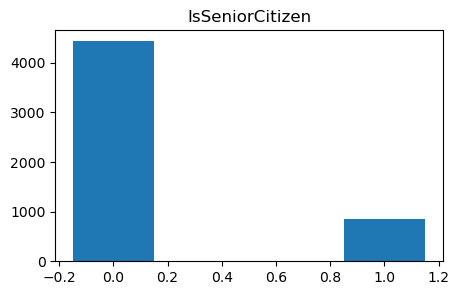

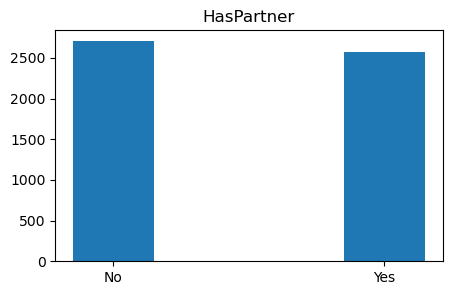

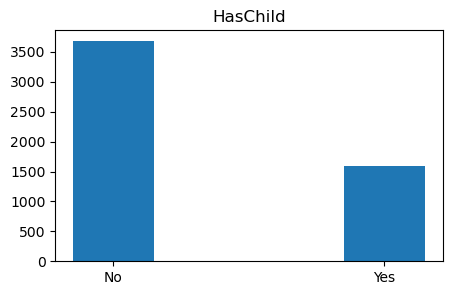

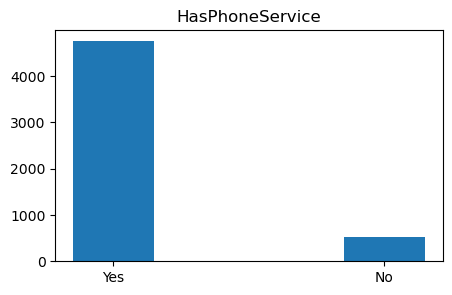

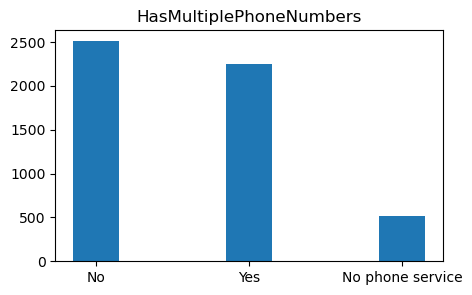

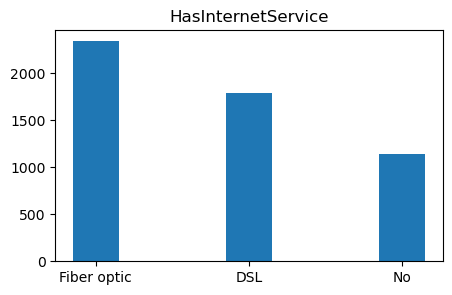

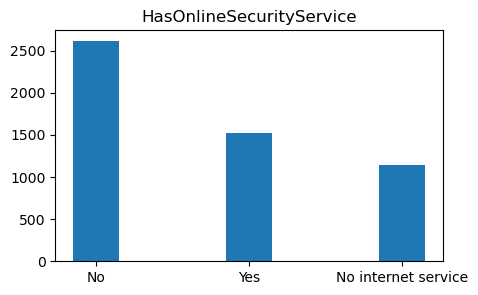

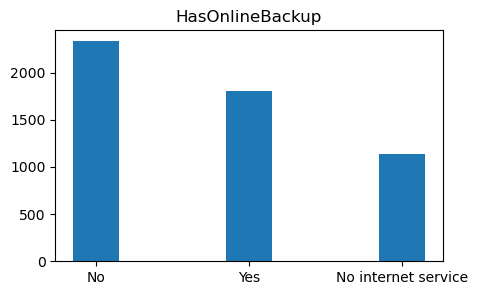

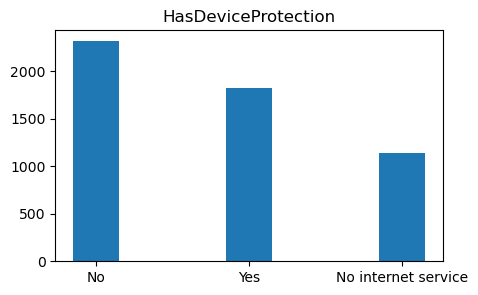

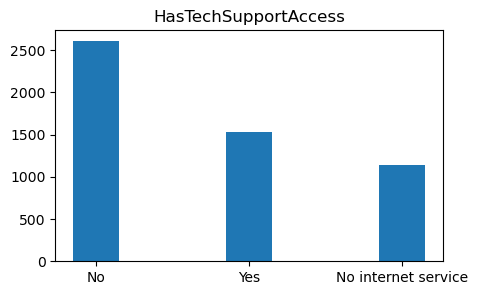

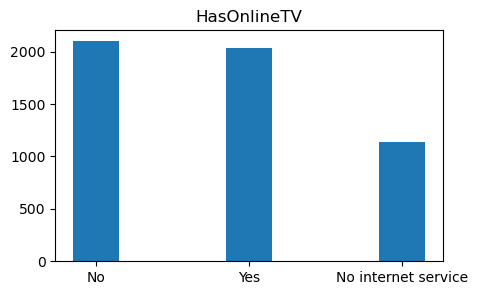

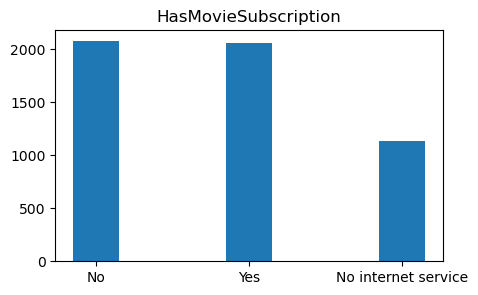

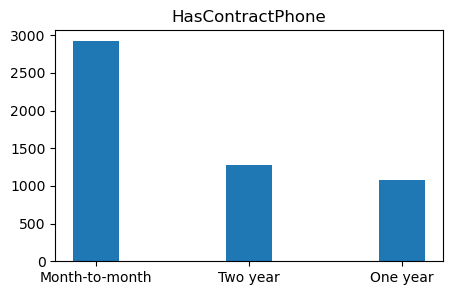

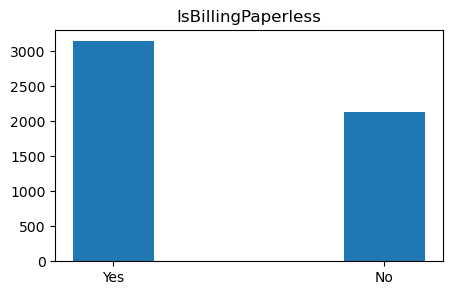

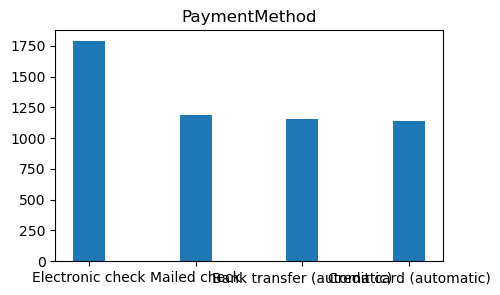

In [490]:
for col in cat_cols:
    value_counts = data[col].value_counts()
    print(value_counts)

    plt.figure(figsize=(5, 3))
    plt.bar(value_counts.index, value_counts.values, width=0.3)
    plt.title(col)


У некоторых данных сильное не равное распределение

<BarContainer object of 2 artists>

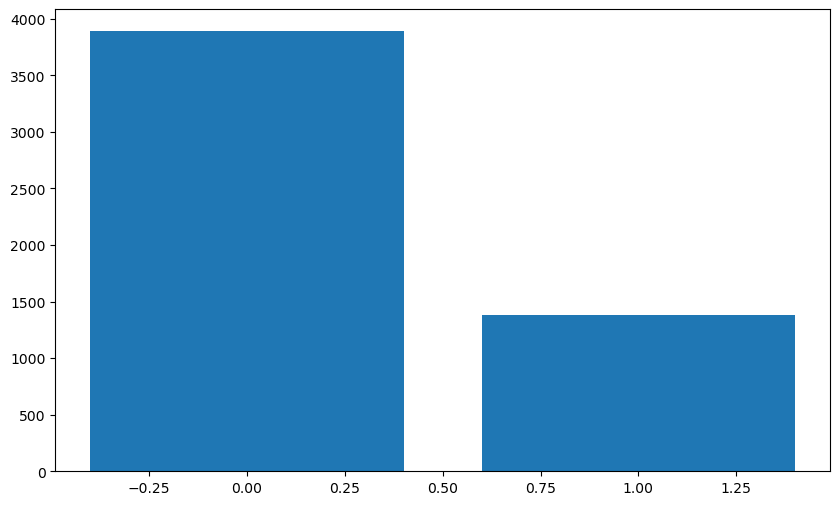

In [491]:
plt.figure(figsize=(10, 6))
target = data[target_col].value_counts()
plt.bar(target.index, target.values)


Классы не сбалансированны

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [492]:
lst = [1, 2, 3, 4]
d = [1, 2]
list(set(lst)-set(d))

[3, 4]

In [493]:
del_cols = ['IsSeniorCitizen', 'HasPhoneService']#, 'HasChild'
data = data.drop(columns=del_cols)
cat_cols = list(set(cat_cols) - set(del_cols))


In [494]:
# YOUR CODE 
data[target_col].value_counts()

Churn
0    3889
1    1384
Name: count, dtype: int64

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [495]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [496]:
num_cols

['MonthlySpending', 'SpentPerPeriod']

In [497]:
data[num_cols].dtypes

MonthlySpending    float64
SpentPerPeriod     float64
dtype: object

In [498]:
# (data['TotalSpent'].unique())

# data['TotalSpent'] = data['TotalSpent'].replace('', np.nan).replace(' ', np.nan)
# data = data.dropna(subset=['TotalSpent'])

In [499]:
data.head()

,MonthlySpending,Sex,HasPartner,HasChild,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,SpentPerPeriod
0,19.50,Male,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,18.660909
1,25.85,Male,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0,26.002778
2,75.90,Male,No,No,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1,75.900000
3,79.30,Female,Yes,No,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0,80.312500
4,115.25,Female,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0,112.640833


In [500]:
data[num_cols].shape, data[cat_cols].shape

((5273, 2), (5273, 14))

In [501]:
encoder = OneHotEncoder(sparse_output=False)
cat_cols_encoded = encoder.fit_transform(data[cat_cols])
encoded_names = encoder.get_feature_names_out(cat_cols)
cat_cols_encoded_df = pd.DataFrame(cat_cols_encoded, columns=encoded_names)
X = pd.concat([data[num_cols].reset_index(drop=True), cat_cols_encoded_df.reset_index(drop=True)], axis=1)

In [502]:
X

,MonthlySpending,SpentPerPeriod,IsBillingPaperless_No,IsBillingPaperless_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasChild_No,HasChild_Yes,Sex_Female,...,HasMovieSubscription_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes
0,19.50,18.660909,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,25.85,26.002778,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,75.90,75.900000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,79.30,80.312500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,115.25,112.640833,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,30.40,27.383333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5269,44.45,43.769000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5270,55.05,55.050000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5271,76.00,76.387931,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [503]:
data[cat_cols]

,IsBillingPaperless,HasDeviceProtection,HasChild,Sex,HasOnlineSecurityService,HasOnlineTV,HasContractPhone,PaymentMethod,HasPartner,HasMultiplePhoneNumbers,HasMovieSubscription,HasInternetService,HasOnlineBackup,HasTechSupportAccess
0,No,No internet service,Yes,Male,No internet service,No internet service,One year,Mailed check,Yes,No,No internet service,No,No internet service,No internet service
1,No,No internet service,No,Male,No internet service,No internet service,Two year,Credit card (automatic),Yes,Yes,No internet service,No,No internet service,No internet service
2,Yes,No,No,Male,No,No,Month-to-month,Electronic check,No,No,No,Fiber optic,No,Yes
3,No,Yes,No,Female,No,No,Month-to-month,Mailed check,Yes,Yes,No,Fiber optic,No,No
4,No,Yes,Yes,Female,Yes,Yes,Two year,Credit card (automatic),Yes,Yes,Yes,Fiber optic,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,No,No,No,Male,No,No,Month-to-month,Electronic check,No,No phone service,No,DSL,No,Yes
5278,Yes,No,No,Male,Yes,Yes,One year,Bank transfer (automatic),Yes,No phone service,No,DSL,No,Yes
5279,No,Yes,No,Male,No,No,Month-to-month,Mailed check,No,No,No,DSL,No,Yes
5280,Yes,No,No,Female,No,No,Month-to-month,Credit card (automatic),No,Yes,No,Fiber optic,No,No


In [504]:
# cat_col_label_enc = ['HasContractPhone']

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# data['EncodedHasContractPhone'] = encoder.fit_transform(data[cat_col_label_enc])
# data = data.drop(columns=cat_col_label_enc)

# cat_cols = list(set(cat_cols) - set(cat_col_label_enc))

# data

In [505]:
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)#, data['EncodedHasContractPhone']
X

,MonthlySpending,SpentPerPeriod,IsBillingPaperless_No,IsBillingPaperless_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasChild_No,HasChild_Yes,Sex_Female,...,HasMovieSubscription_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes
0,19.50,18.660909,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
1,25.85,26.002778,True,False,False,True,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
2,75.90,75.900000,False,True,True,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
3,79.30,80.312500,True,False,False,False,True,True,False,True,...,False,False,True,False,True,False,False,True,False,False
4,115.25,112.640833,True,False,False,False,True,False,True,True,...,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,30.40,27.383333,True,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
5278,44.45,43.769000,False,True,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
5279,55.05,55.050000,True,False,False,False,True,True,False,False,...,False,True,False,False,True,False,False,False,False,True
5280,76.00,76.387931,False,True,True,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False


In [506]:
#X.shape, data[target_col].shape, X.values.shape

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2, random_state=42)

In [508]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train[num_cols])
X_test_scaled = scalar.transform(X_test[num_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols)

X_train = X_train.drop(num_cols, axis=1).reset_index(drop=True)
X_test = X_test.drop(num_cols, axis=1).reset_index(drop=True)

X_train = pd.concat([X_train_scaled_df, X_train], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test], axis=1)


In [509]:
X_train

,MonthlySpending,SpentPerPeriod,IsBillingPaperless_No,IsBillingPaperless_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasChild_No,HasChild_Yes,Sex_Female,...,HasMovieSubscription_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes
0,-1.337732,-1.344302,True,False,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
1,-0.475165,-0.534696,False,True,False,False,True,True,False,True,...,True,True,False,False,True,False,False,True,False,False
2,-0.340803,-0.271216,True,False,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,0.198301,0.109355,False,True,True,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
4,-1.455506,-1.498818,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,-1.488681,-1.473510,True,False,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
4214,-0.654313,-0.662489,True,False,True,False,False,False,True,True,...,False,True,False,False,True,False,False,True,False,False
4215,-1.130384,-1.145900,False,True,True,False,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
4216,0.261335,0.188412,True,False,True,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [510]:
model = LogisticRegressionCV(scoring='roc_auc', refit=True, random_state=52)
model.fit(X_train, y_train)
model.C_

array([2.7825594])

In [511]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
train_roc_auc, test_roc_auc
#(0.723979251883248, 0.7132224581269168)

(0.7059007084158506, 0.6927341354092946)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [512]:
import xgboost
xgmodel = xgboost.XGBClassifier(n_estimators = 500)
xgmodel.fit(X_train, y_train)
y_pred_xg = xgmodel.predict_proba(X_test)

In [513]:
data = pd.read_csv('./train.csv')
data = data.replace('?', np.nan).replace('', np.nan).replace(" ", np.nan)
data = data.dropna()
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [514]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

In [518]:
# YOUR CODE
import catboost
boosting_model = catboost.CatBoostClassifier(n_estimators=500, cat_features=cat_cols, random_state=41)
boosting_model.fit(X_train, y_train)

Learning rate set to 0.035967
0:	learn: 0.6701856	total: 28.4ms	remaining: 14.2s
1:	learn: 0.6491799	total: 35.3ms	remaining: 8.78s
2:	learn: 0.6298653	total: 39.5ms	remaining: 6.54s
3:	learn: 0.6128830	total: 43.4ms	remaining: 5.38s
4:	learn: 0.5976296	total: 49ms	remaining: 4.85s
5:	learn: 0.5842190	total: 52ms	remaining: 4.28s
6:	learn: 0.5721766	total: 55.1ms	remaining: 3.88s
7:	learn: 0.5597412	total: 58.3ms	remaining: 3.58s
8:	learn: 0.5484290	total: 62.9ms	remaining: 3.43s
9:	learn: 0.5393140	total: 65.8ms	remaining: 3.23s
10:	learn: 0.5285559	total: 69.7ms	remaining: 3.1s
11:	learn: 0.5181897	total: 74.2ms	remaining: 3.02s
12:	learn: 0.5101549	total: 78.2ms	remaining: 2.93s
13:	learn: 0.5023196	total: 82.7ms	remaining: 2.87s
14:	learn: 0.4950607	total: 86ms	remaining: 2.78s
15:	learn: 0.4876510	total: 89.4ms	remaining: 2.71s
16:	learn: 0.4814585	total: 92.9ms	remaining: 2.64s
17:	learn: 0.4767066	total: 95.3ms	remaining: 2.55s
18:	learn: 0.4715089	total: 99.1ms	remaining: 2.51s

In [519]:
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

train_auc, test_auc
#(0.8954940575894427, 0.8406581740976646)

(0.8936388617686798, 0.8448808681292758)

In [520]:
boosting_model_grid_search = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols, eval_metric='AUC')
boosting_model_grid_search.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, X_train, y_train, refit=True)

0:	test: 0.8355560	best: 0.8355560 (0)	total: 13ms	remaining: 2.59s
1:	test: 0.8363817	best: 0.8363817 (1)	total: 18.8ms	remaining: 1.86s
2:	test: 0.8352532	best: 0.8363817 (1)	total: 24.7ms	remaining: 1.62s
3:	test: 0.8383635	best: 0.8383635 (3)	total: 30ms	remaining: 1.47s
4:	test: 0.8432526	best: 0.8432526 (4)	total: 38.9ms	remaining: 1.51s
5:	test: 0.8440715	best: 0.8440715 (5)	total: 47.1ms	remaining: 1.52s
6:	test: 0.8441781	best: 0.8441781 (6)	total: 50.7ms	remaining: 1.4s
7:	test: 0.8448903	best: 0.8448903 (7)	total: 61.2ms	remaining: 1.47s
8:	test: 0.8476050	best: 0.8476050 (8)	total: 75ms	remaining: 1.59s
9:	test: 0.8474123	best: 0.8476050 (8)	total: 85.5ms	remaining: 1.62s
10:	test: 0.8465659	best: 0.8476050 (8)	total: 96.9ms	remaining: 1.67s
11:	test: 0.8488643	best: 0.8488643 (11)	total: 107ms	remaining: 1.67s
12:	test: 0.8490397	best: 0.8490397 (12)	total: 112ms	remaining: 1.61s
13:	test: 0.8517957	best: 0.8517957 (13)	total: 120ms	remaining: 1.59s
14:	test: 0.8524184	bes

{'params': {'l2_leaf_reg': 0.3157894736842105},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

In [521]:
y_test_grid_pred = boosting_model_grid_search.predict_proba(X_test)[:, 1]
test_grid_auc = roc_auc_score(y_test, y_test_grid_pred)
test_grid_auc

0.8390705355036564

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [522]:
best_model = boosting_model# какая-то предыдущая модель

In [523]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv', index=False , header = 1)

In [524]:
best_model.predict_proba(X_test), best_model.predict_proba(X_test)[:, 1]

(array([[0.95585986, 0.04414014],
        [0.19725343, 0.80274657],
        [0.33830329, 0.66169671],
        ...,
        [0.09888053, 0.90111947],
        [0.44602595, 0.55397405],
        [0.99104764, 0.00895236]]),
 array([0.04414014, 0.80274657, 0.66169671, ..., 0.90111947, 0.55397405,
        0.00895236]))

Лучшее решение отправьте в Stepik.

In [525]:
len(submission)

1761